In [1]:
import torch
from Nets import Net, NetNoise
from functions import train, test
from dataloaders import MNIST, MNIST_train_random_lebels, dead_leaves_squares_pretraining, dead_leaves_squares_pretraining_gray
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

torch.cuda.is_available()

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


True

-------------------------------------------------- benchmark normal training --------------------------------------------------
Epoch 1 [0 / 50000]       loss: 2.3191401958465576


c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 1 [6400 / 50000]       loss: 0.46042588353157043
Epoch 1 [12800 / 50000]       loss: 0.07335315644741058
Epoch 1 [19200 / 50000]       loss: 0.26224854588508606
Epoch 1 [25600 / 50000]       loss: 0.0938493087887764
Epoch 1 [32000 / 50000]       loss: 0.02689550630748272
Epoch 1 [38400 / 50000]       loss: 0.045085061341524124
Epoch 1 [44800 / 50000]       loss: 0.03255324065685272

Test set: Avg. loss: 0.0792, Accuracy: 9743/10000 (97%)



tensor(97.4300)

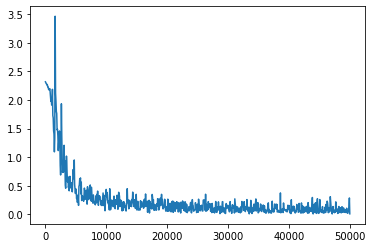

In [7]:
print('-'*50, 'benchmark normal training', '-'*50)
train_loader, val_loader, test_loader = MNIST()
model = Net(10)
optimizer = optim.SGD(model.parameters(), lr=0.1)
train_losses, val_losses, exemplers = train(model, optimizer, train_loader, val_loader)

plt.plot(exemplers, train_losses)
test(model, test_loader)

In [8]:
val_losses

[tensor(13.9600),
 tensor(84.9700),
 tensor(94.9400),
 tensor(95.1100),
 tensor(96.3100),
 tensor(97.1800),
 tensor(97.3300),
 tensor(97.5900)]

-------------------------------------------------- pretraining --------------------------------------------------
Epoch 1 [0 / 60000]       loss: 2.316779851913452
Epoch 1 [6400 / 60000]       loss: 0.6771554350852966
Epoch 1 [12800 / 60000]       loss: 0.4089907705783844
Epoch 1 [19200 / 60000]       loss: 0.18190017342567444
Epoch 1 [25600 / 60000]       loss: 0.5469334721565247
Epoch 1 [32000 / 60000]       loss: 0.5350354909896851
Epoch 1 [38400 / 60000]       loss: 0.2023833692073822
Epoch 1 [44800 / 60000]       loss: 0.18707333505153656
Epoch 1 [51200 / 60000]       loss: 0.2565968930721283
Epoch 1 [57600 / 60000]       loss: 0.2506862282752991

Test set: Avg. loss: 14.5289, Accuracy: 30/10000 (0%)

-------------------------------------------------- training only last layer --------------------------------------------------
Epoch 1 [0 / 50000]       loss: 16.189821243286133
Epoch 1 [6400 / 50000]       loss: 0.18215405941009521
Epoch 1 [12800 / 50000]       loss: 0.1238524839282

tensor(96.3800)

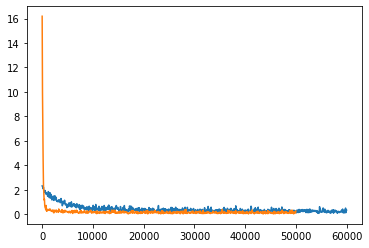

In [9]:
print('-'*50, 'pretraining', '-'*50)
train_loader_random_lebels = MNIST_train_random_lebels()
train_loader, val_loader, test_loader = MNIST()

model = Net(10)
optimizer = optim.SGD(model.parameters(), lr=0.1)
train_losses, val_losses, exemplers = train(model, optimizer, train_loader_random_lebels)
plt.plot(exemplers, train_losses)
test(model, test_loader)

print('-'*50, 'training only last layer', '-'*50)
model.conv1.requires_grad_(False)
model.conv2.requires_grad_(False)
model.conv2_drop.requires_grad_(False)
model.fc1.requires_grad_(False)

train_losses, val_losses, exemplers = train(model, optimizer, train_loader, val_loader)
plt.plot(exemplers, train_losses)
test(model, test_loader)

In [10]:
val_losses

[tensor(0.4800),
 tensor(94.6800),
 tensor(95.3200),
 tensor(95.6800),
 tensor(95.6900),
 tensor(95.9100),
 tensor(95.9800),
 tensor(95.9100)]